## Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Upload Data Base

In [2]:
df_ord = pd.read_csv(r'base_publicaciones.csv')

In [3]:
df_ord.shape

(869470, 10)

In [4]:
df_ord.columns

Index(['ORD_ORDER_ID', 'ITE_ITEM_ID', 'CTLG_PROD_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'is_buybox', 'has_bpp', 'has_claim_seller',
       'is_refund', 'bpp_cashout_final'],
      dtype='object')

In [5]:
df_ord.head()

,ORD_ORDER_ID,ITE_ITEM_ID,CTLG_PROD_ID,ITE_BASE_CURRENT_PRICE,flag_bad_user,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final
0,4577317619,1718794438,10608114,10.66,0,0,0,0,0.0,0.0
1,4542724158,1855945942,15305518,20.32,0,1,0,0,0.0,0.0
2,4603385249,1899937971,6078534,3.33,0,1,0,0,0.0,0.0
3,4588423792,1658897376,14214635,34.45,0,1,0,0,0.0,0.0
4,4546930678,1743613950,15786116,23.54,0,1,0,0,0.0,0.0


In [6]:
df_ord.dtypes

ORD_ORDER_ID                int64
ITE_ITEM_ID                 int64
CTLG_PROD_ID                int64
ITE_BASE_CURRENT_PRICE    float64
flag_bad_user               int64
is_buybox                   int64
has_bpp                     int64
has_claim_seller            int64
is_refund                 float64
bpp_cashout_final         float64
dtype: object

## Describe of the prices of the products

In [7]:
df_prod = df_ord[['CTLG_PROD_ID','ITE_ITEM_ID','ITE_BASE_CURRENT_PRICE']]

In [8]:
df_prod.sample(5)

,CTLG_PROD_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE
629815,15794701,1760604126,20.02
396701,7912355,1855918624,136.61
157583,14421011,1818393794,22.22
43730,11754229,1621612942,48.98
524458,9810238,1852867419,1.41


In [9]:
df_prod.shape

(869470, 3)

In [10]:
gb=df_prod.groupby(['CTLG_PROD_ID'])
df_des=gb['ITE_BASE_CURRENT_PRICE'].describe()
df_des

,count,mean,std,min,25%,50%,75%,max
CTLG_PROD_ID,,,,,,,,
633,2.0,47.590000,1.183697e+01,39.22,43.4050,47.590,51.7750,55.96
5020,22.0,44.903636,4.364103e+00,42.09,42.5025,44.020,44.4025,57.98
802465,51.0,87.916471,6.482665e+01,7.83,7.8300,133.770,140.2100,156.84
802499,7.0,47.891429,1.512552e+00,47.02,47.0200,47.080,48.1650,50.77
802500,2.0,63.605000,1.248043e+01,54.78,59.1925,63.605,68.0175,72.43
...,...,...,...,...,...,...,...,...
18185023,4.0,88.860000,4.180000e+00,86.77,86.7700,86.770,88.8600,95.13
18186809,3.0,120.853333,1.144490e+01,109.22,115.2300,121.240,126.6700,132.10
18209455,40.0,588.700000,4.605405e-13,588.70,588.7000,588.700,588.7000,588.70


## Drop rows with NaN std

In [11]:
countNaN = df_des['std'].isna().sum()
countNaN

1073

In [12]:
df_des.dropna(subset = ['std'], inplace=True)

In [13]:
countNaN = df_des['std'].isna().sum()
countNaN

0

## Reset the index

In [14]:
df_des=df_des.reset_index()

In [15]:
df_des.head()

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max
0,633,2.0,47.590000,11.836968,39.22,43.4050,47.590,51.7750,55.96
1,5020,22.0,44.903636,4.364103,42.09,42.5025,44.020,44.4025,57.98
2,802465,51.0,87.916471,64.826648,7.83,7.8300,133.770,140.2100,156.84
3,802499,7.0,47.891429,1.512552,47.02,47.0200,47.080,48.1650,50.77
4,802500,2.0,63.605000,12.480435,54.78,59.1925,63.605,68.0175,72.43


In [16]:
df_des.shape

(8482, 9)

## Join the DFs by Product ID

In [17]:
df = pd.merge(left = df_des, right = df_ord,
                how = 'inner',
                left_on='CTLG_PROD_ID', right_on='CTLG_PROD_ID')

In [18]:
df.shape

(868397, 18)

In [19]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'is_buybox', 'has_bpp', 'has_claim_seller',
       'is_refund', 'bpp_cashout_final'],
      dtype='object')

In [20]:
df.sample(5)

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max,ORD_ORDER_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,flag_bad_user,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final
416256,15280550,17.0,3.400588,0.383739,2.41,3.54,3.54,3.54,3.90,4591910739,1872659461,3.54,0,1,0,0,0.0,0.00
501917,15586822,827.0,372.816796,141.734210,272.49,301.21,345.24,377.23,985.00,4571824972,1791646169,414.80,0,0,1,1,0.0,385.69
25047,6078511,481.0,10.849771,1.974317,5.96,9.12,9.95,12.39,18.91,4548697700,1811715297,9.95,0,1,0,0,0.0,0.00
532602,15755060,147.0,51.785510,5.091482,21.92,49.01,51.60,54.94,58.69,4600907635,1538580117,51.84,0,0,0,0,0.0,0.00
740253,16211882,1627.0,220.891328,13.576629,159.36,225.48,225.55,226.53,295.50,4576404144,1791397960,234.26,0,1,0,0,0.0,0.00


## Order weight on products

In [21]:
df['weight'] = 1/df[['count']]

In [22]:
df.sample(5)

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max,ORD_ORDER_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,flag_bad_user,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,weight
110781,6345082,675.0,37.761274,7.842546,13.74,32.76,38.24,41.160,204.16,4537799340,1397559201,39.37,0,1,0,0,0.0,0.0,0.001481
80760,6248205,1409.0,35.744216,3.126226,29.23,33.86,35.92,35.950,56.96,4603902035,1758391000,34.58,0,1,1,1,1.0,0.0,0.000710
210539,9338771,192.0,55.644479,5.940800,39.82,52.81,57.94,58.275,90.02,4576001960,1520482681,57.94,0,1,0,1,0.0,0.0,0.005208
461504,15388664,112.0,78.685268,1.960691,78.50,78.50,78.50,78.500,99.25,4589550359,1683176090,78.50,0,1,0,0,0.0,0.0,0.008929
551974,15793964,1493.0,260.216618,49.919171,27.47,252.48,258.24,269.710,983.00,4541836347,1827346094,256.10,0,1,0,0,0.0,0.0,0.000670


In [23]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'is_buybox', 'has_bpp', 'has_claim_seller',
       'is_refund', 'bpp_cashout_final', 'weight'],
      dtype='object')

## Bad orders

In [24]:
df['bad_order'] = df.apply(lambda x: 1 if x['flag_bad_user'] == 1 or x['has_bpp'] == 1 or x['has_claim_seller'] == 1 or x['is_refund'] == 1 or x['bpp_cashout_final'] > 0 else 0, axis=1)


In [25]:
df.sample(5)

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max,ORD_ORDER_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,flag_bad_user,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,weight,bad_order
648436,16000342,1937.0,45.632772,4.313746,35.43,44.33,44.33,46.82,63.66,4547213564,1778268727,49.25,0,1,0,0,0.0,0.0,0.000516,0
831723,17449009,1161.0,154.801025,25.299836,113.58,145.80,145.80,146.20,222.37,4597189990,1857032605,146.20,0,1,0,0,0.0,0.0,0.000861,0
512440,15700283,3956.0,3.890432,2.643229,1.32,3.34,4.00,4.32,57.36,4567780678,1552293579,4.51,0,0,0,0,0.0,0.0,0.000253,0
104472,6333700,110.0,389.857273,25.121747,275.08,372.97,372.97,408.11,437.75,4586790780,1752235683,372.97,0,1,0,0,0.0,0.0,0.009091,0
328067,14605138,337.0,30.791543,2.553119,23.56,29.43,30.61,33.23,35.28,4567275011,1722048363,29.43,0,1,0,0,0.0,0.0,0.002967,0


In [26]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'is_buybox', 'has_bpp', 'has_claim_seller',
       'is_refund', 'bpp_cashout_final', 'weight', 'bad_order'],
      dtype='object')

# Base on the Price_Range

## Create columns flag low_price for those items with price below the 25%

In [27]:
df['Low25_Price'] = df.apply(lambda x: 1 if x['25%'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create columns flag middle_price for items with price below the 75% and over the  25%

In [28]:
df['Middle_Price'] = df.apply(lambda x: 1 if x['75%'] >= x['ITE_BASE_CURRENT_PRICE'] and x['25%'] <= x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)


## Create column flag high_price for those items with price over the 75%

In [29]:
df['High75_Price'] = df.apply(lambda x: 1 if x['75%'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create column flag price_range

In [30]:
df['Price_Range'] = df.apply(lambda x:'low_25' if x['Low25_Price']== 1 else('high_75' if  x['High75_Price']==1  else 'middle'),axis=1)


In [31]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'is_buybox', 'has_bpp', 'has_claim_seller',
       'is_refund', 'bpp_cashout_final', 'weight', 'bad_order', 'Low25_Price',
       'Middle_Price', 'High75_Price', 'Price_Range'],
      dtype='object')

In [32]:
df.sample(5)

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max,ORD_ORDER_ID,...,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,weight,bad_order,Low25_Price,Middle_Price,High75_Price,Price_Range
361280,15121865,1278.0,158.815493,12.099898,123.84,150.80,150.80,169.24,176.47,4558267581,...,0,0,0.0,0.0,0.000782,0,0,1,0,middle
89740,6287694,99.0,129.222121,92.421419,21.85,37.85,214.76,214.76,214.76,4598095731,...,0,0,0.0,0.0,0.010101,0,1,0,0,low_25
195005,8898171,286.0,40.983077,5.022472,33.73,37.78,38.51,45.06,50.30,4582369619,...,0,0,0.0,0.0,0.003497,0,0,1,0,middle
51759,6131854,184.0,34.597989,5.378650,9.55,29.97,34.54,38.62,58.95,4549407308,...,0,0,0.0,0.0,0.005435,0,0,0,1,high_75
275470,12838063,148.0,37.401959,2.614026,32.45,35.24,38.38,39.06,42.98,4583519318,...,1,1,1.0,0.0,0.006757,1,0,1,0,middle


## Distribution Bad Orders

In [33]:
df_1=df[['Price_Range','bad_order','ORD_ORDER_ID']]

In [34]:
gb1=df_1.groupby(['Price_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,120675,140534,85.9
1,high_75,1,19859,140534,14.1
2,low_25,0,100553,126987,79.2
3,low_25,1,26434,126987,20.8
4,middle,0,523584,600876,87.1
5,middle,1,77292,600876,12.9


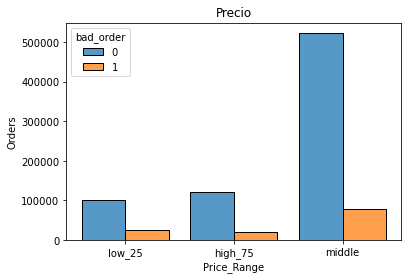

In [35]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="bad_order",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Bad Users

In [36]:
df_1=df[['Price_Range','flag_bad_user','ORD_ORDER_ID']]

In [37]:
gb1=df_1.groupby(['Price_Range','flag_bad_user']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,flag_bad_user,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,136138,140534,96.9
1,high_75,1,4396,140534,3.1
2,low_25,0,119663,126987,94.2
3,low_25,1,7324,126987,5.8
4,middle,0,582734,600876,97.0
5,middle,1,18142,600876,3.0


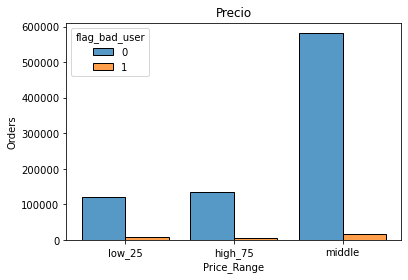

In [38]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="flag_bad_user",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has CashOut

In [39]:
df_1=df[['Price_Range','bpp_cashout_final','ORD_ORDER_ID']]
df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)
df_1=df_1[['Price_Range','has_co','ORD_ORDER_ID']]

<ipython-input-39-239d2c268fe3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)


In [40]:
gb1=df_1.groupby(['Price_Range','has_co']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,has_co,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,139690,140534,99.4
1,high_75,1,844,140534,0.6
2,low_25,0,125609,126987,98.9
3,low_25,1,1378,126987,1.1
4,middle,0,597099,600876,99.4
5,middle,1,3777,600876,0.6


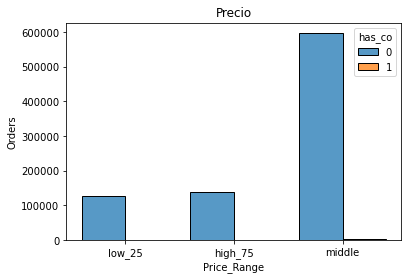

In [41]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="has_co",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has Claim

In [42]:
df_1=df[['Price_Range','has_claim_seller','ORD_ORDER_ID']]

In [43]:
gb1=df_1.groupby(['Price_Range','has_claim_seller']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,has_claim_seller,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,127238,140534,90.5
1,high_75,1,13296,140534,9.5
2,low_25,0,110606,126987,87.1
3,low_25,1,16381,126987,12.9
4,middle,0,551372,600876,91.8
5,middle,1,49504,600876,8.2


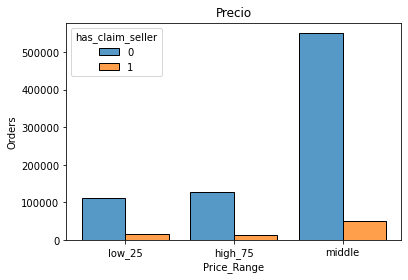

In [44]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="has_claim_seller",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution is Refund

In [45]:
df_1=df[['Price_Range','is_refund','ORD_ORDER_ID']]

In [46]:
gb1=df_1.groupby(['Price_Range','is_refund']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,is_refund,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0.0,127272,140533,90.6
1,high_75,1.0,13261,140533,9.4
2,low_25,0.0,109284,126978,86.1
3,low_25,1.0,17694,126978,13.9
4,middle,0.0,551477,600874,91.8
5,middle,1.0,49397,600874,8.2


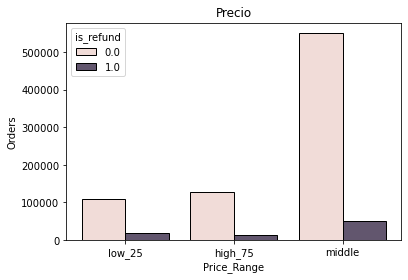

In [47]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="is_refund",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

# Base on the STD_Range

## Create DF STD

In [55]:
df_std = df_des[['CTLG_PROD_ID','mean']]
df_std['STDx1'] = df_des['std']
df_std['STDx1.25'] = df_des['std']*1.25
df_std['STDx1.5'] = df_des['std']*1.5
df_std['STDx1.75'] = df_des['std']*1.75
df_std['STDx2'] = df_des['std']*2
df_std['STDx2.25'] = df_des['std']*2.25
df_std['STDx2.5'] = df_des['std']*2.5
df_std['STDx2.75'] = df_des['std']*2.75
df_std['STDx3'] = df_des['std']*3
df_std=df_std.round(decimals=2)

<ipython-input-55-01a83c4a6b8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_std['STDx1'] = df_des['std']
<ipython-input-55-01a83c4a6b8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_std['STDx1.25'] = df_des['std']*1.25
<ipython-input-55-01a83c4a6b8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [56]:
df_std.sample(5)

,CTLG_PROD_ID,mean,STDx1,STDx1.25,STDx1.5,STDx1.75,STDx2,STDx2.25,STDx2.5,STDx2.75,STDx3
7810,16269737,268.04,21.42,26.77,32.13,37.48,42.84,48.19,53.55,58.90,64.26
3374,13768441,167.18,5.19,6.49,7.78,9.08,10.38,11.67,12.97,14.27,15.56
6815,15989658,46.60,16.24,20.30,24.36,28.42,32.48,36.54,40.60,44.66,48.72
7243,16082171,70.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1510,7991846,57.27,4.13,5.16,6.19,7.22,8.25,9.28,10.31,11.35,12.38


In [54]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'is_buybox', 'has_bpp', 'has_claim_seller',
       'is_refund', 'bpp_cashout_final', 'weight', 'bad_order', 'Low25_Price',
       'Middle_Price', 'High75_Price', 'Price_Range'],
      dtype='object')

## Join the DF STD with the rest of the info

In [57]:
df_red = df[['CTLG_PROD_ID','ORD_ORDER_ID','ITE_ITEM_ID','ITE_BASE_CURRENT_PRICE','flag_bad_user','has_bpp','has_claim_seller','is_refund','bpp_cashout_final','bad_order']]
df_s = pd.merge(left = df_red, right = df_std,
                how = 'inner',
                left_on='CTLG_PROD_ID', right_on='CTLG_PROD_ID')

In [58]:
df_s.sample(5)

,CTLG_PROD_ID,ORD_ORDER_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,flag_bad_user,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,bad_order,mean,STDx1,STDx1.25,STDx1.5,STDx1.75,STDx2,STDx2.25,STDx2.5,STDx2.75,STDx3
656097,16004905,4601248038,1756759973,80.29,0,0,0,0.0,0.0,0,80.37,0.73,0.91,1.09,1.27,1.45,1.63,1.82,2.00,2.18
791663,16926661,4554105664,1703408677,113.55,0,0,0,0.0,0.0,0,115.12,7.60,9.50,11.40,13.30,15.19,17.09,18.99,20.89,22.79
615366,15961044,4571776133,1656034416,30.41,0,0,0,0.0,0.0,0,35.88,7.21,9.01,10.81,12.61,14.41,16.21,18.02,19.82,21.62
31918,6078680,4593182782,1495954384,69.08,0,0,0,0.0,0.0,0,62.81,22.68,28.35,34.03,39.70,45.37,51.04,56.71,62.38,68.05
158799,7942172,4579383295,1820029677,64.78,0,1,1,1.0,0.0,1,69.11,5.30,6.62,7.95,9.27,10.60,11.92,13.25,14.57,15.90


In [71]:
df_s.columns

Index(['CTLG_PROD_ID', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'has_bpp', 'has_claim_seller', 'is_refund',
       'bpp_cashout_final', 'bad_order', 'mean', 'STDx1', 'STDx1.25',
       'STDx1.5', 'STDx1.75', 'STDx2', 'STDx2.25', 'STDx2.5', 'STDx2.75',
       'STDx3', 'media-2std', 'Low_2STD', 'media+2std', 'High_2STD',
       'STD_Range'],
      dtype='object')

## Create column flag below 2 STD

In [72]:
df_s['media-1std'] = df_s['mean'] - df_s['STDx1']
df_s['media-1.25std'] = df_s['mean'] - df_s['STDx1.25']
df_s['media-1.5std'] = df_s['mean'] - df_s['STDx1.5']
df_s['media-1.75std'] = df_s['mean'] - df_s['STDx1.75']
df_s['media-2std'] = df_s['mean'] - df_s['STDx2']
df_s['media-2.25std'] = df_s['mean'] - df_s['STDx2.25']
df_s['media-2.5std'] = df_s['mean'] - df_s['STDx2.5']
df_s['media-2.75std'] = df_s['mean'] - df_s['STDx2.75']
df_s['media-3std'] = df_s['mean'] - df_s['STDx3']

In [73]:
df_s['Low_1STD'] = df_s.apply(lambda x: 1 if x['media-1std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_1.25STD'] = df_s.apply(lambda x: 1 if x['media-1.25std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_1.5STD'] = df_s.apply(lambda x: 1 if x['media-1.5std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_1.75STD'] = df_s.apply(lambda x: 1 if x['media-1.75std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_2STD'] = df_s.apply(lambda x: 1 if x['media-2std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_2.25STD'] = df_s.apply(lambda x: 1 if x['media-2.25std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_2.5STD'] = df_s.apply(lambda x: 1 if x['media-2.5std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_2.75STD'] = df_s.apply(lambda x: 1 if x['media-2.75std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_3STD'] = df_s.apply(lambda x: 1 if x['media-3std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create column flag over 2 STD

In [74]:
df_s['media+1std'] = df_s['mean'] + df_s['STDx1']
df_s['media+1.25std'] = df_s['mean'] + df_s['STDx1.25']
df_s['media+1.5std'] = df_s['mean'] + df_s['STDx1.5']
df_s['media+1.75std'] = df_s['mean'] + df_s['STDx1.75']
df_s['media+2std'] = df_s['mean'] + df_s['STDx2']
df_s['media+2.25std'] = df_s['mean'] + df_s['STDx2.25']
df_s['media+2.5std'] = df_s['mean'] + df_s['STDx2.5']
df_s['media+2.75std'] = df_s['mean'] + df_s['STDx2.75']
df_s['media+3std'] = df_s['mean'] + df_s['STDx3']

In [75]:
df_s['High_1STD'] = df_s.apply(lambda x: 1 if x['media+1std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_1.25STD'] = df_s.apply(lambda x: 1 if x['media+1.25std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_1.5STD'] = df_s.apply(lambda x: 1 if x['media+1.5std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_1.75STD'] = df_s.apply(lambda x: 1 if x['media+1.75std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_2STD'] = df_s.apply(lambda x: 1 if x['media+2std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_2.25STD'] = df_s.apply(lambda x: 1 if x['media+2.25std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_2.5STD'] = df_s.apply(lambda x: 1 if x['media+2.5std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_2.75STD'] = df_s.apply(lambda x: 1 if x['media+2.75std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_3STD'] = df_s.apply(lambda x: 1 if x['media+3std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create column flag STD_range

In [76]:
df_s['1STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_1STD']== 1 else('high_STD' if  x['High_1STD']==1  else 'middle_STD'),axis=1)
df_s['1.25STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_1.25STD']== 1 else('high_STD' if  x['High_1.25STD']==1  else 'middle_STD'),axis=1)
df_s['1.5STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_1.5STD']== 1 else('high_STD' if  x['High_1.5STD']==1  else 'middle_STD'),axis=1)
df_s['1.75STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_1.75STD']== 1 else('high_STD' if  x['High_1.75STD']==1  else 'middle_STD'),axis=1)
df_s['2STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_2STD']== 1 else('high_STD' if  x['High_2STD']==1  else 'middle_STD'),axis=1)
df_s['2.25STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_2.25STD']== 1 else('high_STD' if  x['High_2.25STD']==1  else 'middle_STD'),axis=1)
df_s['2.5STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_2.5STD']== 1 else('high_STD' if  x['High_2.5STD']==1  else 'middle_STD'),axis=1)
df_s['2.75STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_2.75STD']== 1 else('high_STD' if  x['High_2.75STD']==1  else 'middle_STD'),axis=1)
df_s['3STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_3STD']== 1 else('high_STD' if  x['High_3STD']==1  else 'middle_STD'),axis=1)


In [77]:
df_s.columns

Index(['CTLG_PROD_ID', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'has_bpp', 'has_claim_seller', 'is_refund',
       'bpp_cashout_final', 'bad_order', 'mean', 'STDx1', 'STDx1.25',
       'STDx1.5', 'STDx1.75', 'STDx2', 'STDx2.25', 'STDx2.5', 'STDx2.75',
       'STDx3', 'media-2std', 'Low_2STD', 'media+2std', 'High_2STD',
       'STD_Range', 'media-1std', 'media-1.25std', 'media-1.5std',
       'media-1.75std', 'media-2.25std', 'media-2.5std', 'media-2.75std',
       'media-3std', 'Low_1STD', 'Low_1.25STD', 'Low_1.5STD', 'Low_1.75STD',
       'Low_2.25STD', 'Low_2.5STD', 'Low_2.75STD', 'Low_3STD', 'media+1std',
       'media+1.25std', 'media+1.5std', 'media+1.75std', 'media+2.25std',
       'media+2.5std', 'media+2.75std', 'media+3std', 'High_1STD',
       'High_1.25STD', 'High_1.5STD', 'High_1.75STD', 'High_2.25STD',
       'High_2.5STD', 'High_2.75STD', 'High_3STD', '1STD_Range',
       '1.25STD_Range', '1.5STD_Range', '1.75STD_Range', '2STD_Range

In [78]:
df_s.sample(5)

,CTLG_PROD_ID,ORD_ORDER_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,flag_bad_user,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,bad_order,...,High_3STD,1STD_Range,1.25STD_Range,1.5STD_Range,1.75STD_Range,2STD_Range,2.25STD_Range,2.5STD_Range,2.75STD_Range,3STD_Range
397581,15245949,4591059477,1116032739,11.76,0,0,0,0.0,0.0,0,...,0,low_STD,low_STD,low_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD
576221,15843882,4594018950,1563539699,235.36,0,0,0,0.0,0.0,0,...,0,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD
712415,16141900,4594878577,1815214027,37.44,1,0,0,0.0,0.0,1,...,0,high_STD,high_STD,high_STD,high_STD,high_STD,high_STD,high_STD,middle_STD,middle_STD
260814,11547168,4580133057,1739484653,38.06,0,0,0,0.0,0.0,0,...,0,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD
184900,8755483,4593083810,1891834552,484.82,0,0,0,0.0,0.0,0,...,0,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD


In [79]:
df_2=df_s[['1STD_Range','1.25STD_Range','1.5STD_Range','1.75STD_Range','2STD_Range','2.25STD_Range','2.5STD_Range','2.75STD_Range','3STD_Range','bad_order','ORD_ORDER_ID']]
df_2.sample(5)

,1STD_Range,1.25STD_Range,1.5STD_Range,1.75STD_Range,2STD_Range,2.25STD_Range,2.5STD_Range,2.75STD_Range,3STD_Range,bad_order,ORD_ORDER_ID
545608,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,1,4598895064
821933,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,0,4552301868
356369,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,0,4535267758
423881,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,0,4563340468
2544,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,0,4586321327


## Distribution Bad Orders by STD

In [172]:
df_1=df_s[['1STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['1STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['1STD_Range','ORD_ORDER_ID']].groupby(['1STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['1STD_Range','TOTAL']]

ds_1 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='1STD_Range', right_on='1STD_Range')

ds_1['Dis.[%]']=(ds_1['ORD_ORDER_ID']/ds_1['TOTAL'])*100
ds_1['Dis.[%]']=ds_1['Dis.[%]'].round(decimals=1)

ds_1=ds_1[ds_1['bad_order']==1]
ds_1=ds_1[ds_1['1STD_Range']=='low_STD']

In [173]:
df_1=df_s[['1.25STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['1.25STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['1.25STD_Range','ORD_ORDER_ID']].groupby(['1.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['1.25STD_Range','TOTAL']]

ds_125 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='1.25STD_Range', right_on='1.25STD_Range')

ds_125['Dis.[%]']=(ds_125['ORD_ORDER_ID']/ds_125['TOTAL'])*100
ds_125['Dis.[%]']=ds_125['Dis.[%]'].round(decimals=1)

ds_125=ds_125[ds_125['bad_order']==1]
ds_125=ds_125[ds_125['1.25STD_Range']=='low_STD']

In [174]:
df_1=df_s[['1.5STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['1.5STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['1.5STD_Range','ORD_ORDER_ID']].groupby(['1.5STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['1.5STD_Range','TOTAL']]

ds_15 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='1.5STD_Range', right_on='1.5STD_Range')

ds_15['Dis.[%]']=(ds_15['ORD_ORDER_ID']/ds_15['TOTAL'])*100
ds_15['Dis.[%]']=ds_15['Dis.[%]'].round(decimals=1)

ds_15=ds_15[ds_15['bad_order']==1]
ds_15=ds_15[ds_15['1.5STD_Range']=='low_STD']

In [175]:
df_1=df_s[['1.75STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['1.75STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['1.75STD_Range','ORD_ORDER_ID']].groupby(['1.75STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['1.75STD_Range','TOTAL']]

ds_175 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='1.75STD_Range', right_on='1.75STD_Range')

ds_175['Dis.[%]']=(ds_175['ORD_ORDER_ID']/ds_175['TOTAL'])*100
ds_175['Dis.[%]']=ds_175['Dis.[%]'].round(decimals=1)

ds_175=ds_175[ds_175['bad_order']==1]
ds_175=ds_175[ds_175['1.75STD_Range']=='low_STD']

In [176]:
df_1=df_s[['2STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['2STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['2STD_Range','ORD_ORDER_ID']].groupby(['2STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2STD_Range','TOTAL']]

ds_2 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2STD_Range', right_on='2STD_Range')

ds_2['Dis.[%]']=(ds_2['ORD_ORDER_ID']/ds_2['TOTAL'])*100
ds_2['Dis.[%]']=ds_2['Dis.[%]'].round(decimals=1)

ds_2=ds_2[ds_2['bad_order']==1]
ds_2=ds_2[ds_2['2STD_Range']=='low_STD']

In [177]:
df_1=df_s[['2.25STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['2.25STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

ds_225 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

ds_225['Dis.[%]']=(ds_225['ORD_ORDER_ID']/ds_225['TOTAL'])*100
ds_225['Dis.[%]']=ds_225['Dis.[%]'].round(decimals=1)

ds_225=ds_225[ds_225['bad_order']==1]
ds_225=ds_225[ds_225['2.25STD_Range']=='low_STD']

In [178]:
df_1=df_s[['2.5STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['2.5STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.5STD_Range','ORD_ORDER_ID']].groupby(['2.5STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.5STD_Range','TOTAL']]

ds_25 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.5STD_Range', right_on='2.5STD_Range')

ds_25['Dis.[%]']=(ds_25['ORD_ORDER_ID']/ds_25['TOTAL'])*100
ds_25['Dis.[%]']=ds_25['Dis.[%]'].round(decimals=1)

ds_25=ds_25[ds_25['bad_order']==1]
ds_25=ds_25[ds_25['2.5STD_Range']=='low_STD']

In [179]:
df_1=df_s[['2.75STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['2.75STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.75STD_Range','ORD_ORDER_ID']].groupby(['2.75STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.75STD_Range','TOTAL']]

ds_275 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.75STD_Range', right_on='2.75STD_Range')

ds_275['Dis.[%]']=(ds_275['ORD_ORDER_ID']/ds_275['TOTAL'])*100
ds_275['Dis.[%]']=ds_275['Dis.[%]'].round(decimals=1)

ds_275=ds_275[ds_275['bad_order']==1]
ds_275=ds_275[ds_275['2.75STD_Range']=='low_STD']

In [180]:
df_1=df_s[['3STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['3STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['3STD_Range','ORD_ORDER_ID']].groupby(['3STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['3STD_Range','TOTAL']]

ds_3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='3STD_Range', right_on='3STD_Range')

ds_3['Dis.[%]']=(ds_3['ORD_ORDER_ID']/ds_3['TOTAL'])*100
ds_3['Dis.[%]']=ds_3['Dis.[%]'].round(decimals=1)

ds_3=ds_3[ds_3['bad_order']==1]
ds_3=ds_3[ds_3['3STD_Range']=='low_STD']

In [181]:
ds_1

,1STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
3,low_STD,1,13009,59974,21.7


In [182]:
ds_125

,1.25STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
3,low_STD,1,8395,33889,24.8


In [183]:
ds_15

,1.5STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
3,low_STD,1,5528,19755,28.0


In [184]:
ds_175

,1.75STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
3,low_STD,1,4040,12347,32.7


In [185]:
ds_2

,2STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
3,low_STD,1,2929,8492,34.5


In [186]:
ds_225

,2.25STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
3,low_STD,1,2249,6012,37.4


In [187]:
ds_25

,2.5STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
3,low_STD,1,1807,4324,41.8


In [188]:
ds_275

,2.75STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
3,low_STD,1,1489,3248,45.8


In [189]:
ds_3

,3STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
3,low_STD,1,1279,2537,50.4


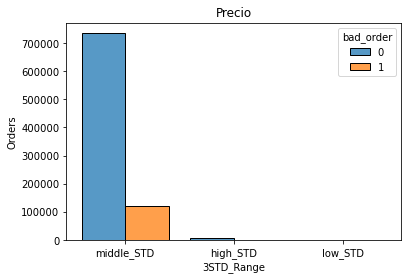

In [192]:
sns.histplot(
            data=df_1,
            x="3STD_Range",
            hue="bad_order",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Bad Users

In [84]:
df_1=df_s[['STD_Range','flag_bad_user','ORD_ORDER_ID']]

In [85]:
gb1=df_1.groupby(['STD_Range','flag_bad_user']).count()
gb1=gb1.reset_index()

gb2=gb1[['STD_Range','ORD_ORDER_ID']].groupby(['STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='STD_Range', right_on='STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2STD_Range,flag_bad_user,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_STD,0,24801,25477,97.3
1,high_STD,1,676,25477,2.7
2,low_STD,0,8042,8492,94.7
3,low_STD,1,450,8492,5.3
4,middle_STD,0,805692,834428,96.6
5,middle_STD,1,28736,834428,3.4


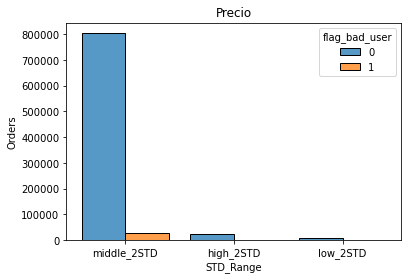

In [83]:
sns.histplot(
            data=df_1,
            x="STD_Range",
            hue="flag_bad_user",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has CashOut

In [43]:
df_1=df_s[['STD_Range','bpp_cashout_final','ORD_ORDER_ID']]
df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)
df_1=df_1[['STD_Range','has_co','ORD_ORDER_ID']]

<ipython-input-43-080048337619>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)


In [44]:
gb1=df_1.groupby(['STD_Range','has_co']).count()
gb1=gb1.reset_index()

gb2=gb1[['STD_Range','ORD_ORDER_ID']].groupby(['STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='STD_Range', right_on='STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,STD_Range,has_co,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_2STD,0,19963,20046,99.6
1,high_2STD,1,83,20046,0.4
2,low_2STD,0,5201,5310,97.9
3,low_2STD,1,109,5310,2.1
4,middle_2STD,0,837234,843041,99.3
5,middle_2STD,1,5807,843041,0.7


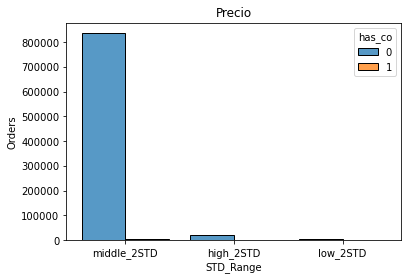

In [45]:
sns.histplot(
            data=df_1,
            x="STD_Range",
            hue="has_co",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has Claim

In [46]:
df_1=df_s[['STD_Range','has_claim_seller','ORD_ORDER_ID']]

In [47]:
gb1=df_1.groupby(['STD_Range','has_claim_seller']).count()
gb1=gb1.reset_index()

gb2=gb1[['STD_Range','ORD_ORDER_ID']].groupby(['STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='STD_Range', right_on='STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,STD_Range,has_claim_seller,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_2STD,0,17889,20046,89.2
1,high_2STD,1,2157,20046,10.8
2,low_2STD,0,3807,5310,71.7
3,low_2STD,1,1503,5310,28.3
4,middle_2STD,0,767520,843041,91.0
5,middle_2STD,1,75521,843041,9.0


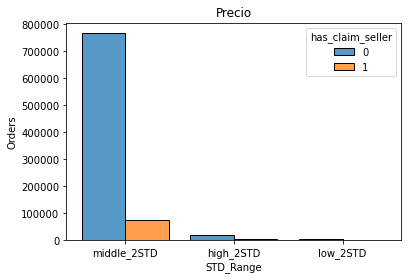

In [48]:
sns.histplot(
            data=df_1,
            x="STD_Range",
            hue="has_claim_seller",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution is Refund

In [49]:
df_1=df_s[['STD_Range','is_refund','ORD_ORDER_ID']]

In [50]:
gb1=df_1.groupby(['STD_Range','is_refund']).count()
gb1=gb1.reset_index()

gb2=gb1[['STD_Range','ORD_ORDER_ID']].groupby(['STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='STD_Range', right_on='STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,STD_Range,is_refund,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_2STD,0.0,17999,20046,89.8
1,high_2STD,1.0,2047,20046,10.2
2,low_2STD,0.0,3531,5309,66.5
3,low_2STD,1.0,1778,5309,33.5
4,middle_2STD,0.0,766503,843030,90.9
5,middle_2STD,1.0,76527,843030,9.1


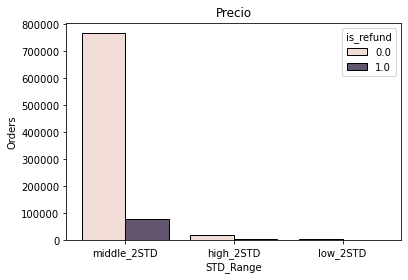

In [51]:
sns.histplot(
            data=df_1,
            x="STD_Range",
            hue="is_refund",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Export the products IDs

In [ ]:
#ID=df['CTLG_PROD_ID']
#ID.to_csv(r'products_id.csv', index = False)

In [ ]:
#LAMBDA CON AND
#df_ratios['extremos']= df_ratios.apply(lambda x: 'caso1' if x['ratio_recla_1m']> 0.3 and x['ratio_cashout_1m']> 0.3 and x['ratio_ref_1m']> 0.3 and x['ratio_claims_1m']> 0.3 else 'no',axis=1)


In [ ]:
#LAMDA CON IF ANIDADO
#df['adicionales']= df.apply(lambda x: 'caso1' if x['gmv_90d']<= 0 else('caso2' if  x['gmv_30d']<=0  else 'no'),axis=1)
